In [1]:
import pandas as pd

#Instructions#
##House grouping system##
We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

###Step 1: Loading the dataset###

Or download it and add it by hand in your repository. In this case, we are only interested in the Latitude, Longitude and MedInc columns.

Be sure to conveniently split the dataset into train and test as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [2]:
URL='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

In [3]:
data1=pd.read_csv(URL)

In [4]:
data=data1[['Latitude', 'Longitude', 'MedInc']]

In [5]:
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data=train_test_split(
    data, test_size=0.2, random_state=42)

In [8]:
n_clusters=2

In [9]:
# Definir el modelo KMeans
model = KMeans(n_clusters=n_clusters, random_state=42)

In [10]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(train_data)

KMeans(n_clusters=2, random_state=42)

In [11]:
#Evaluar el modelo con los datos de prueba (predict en test_data)
test_predictions = model.predict(test_data)

Silhouette Score: 0.5716576874944452


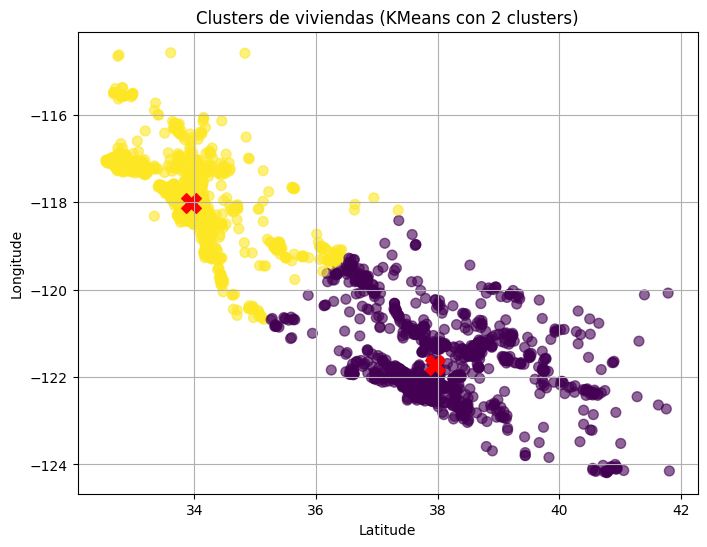

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Calcular el Silhouette Score para evaluar el clustering
sil_score = silhouette_score(test_data, test_predictions)
print(f"Silhouette Score: {sil_score}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))

# Crear un scatter plot
plt.scatter(test_data.iloc[:, 0], test_data.iloc[:, 1], c=test_predictions, cmap='viridis', s=50, alpha=0.6)

# Marcar los centros de los clusters
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centros en rojo

plt.title(f'Clusters de viviendas (KMeans con {n_clusters} clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()


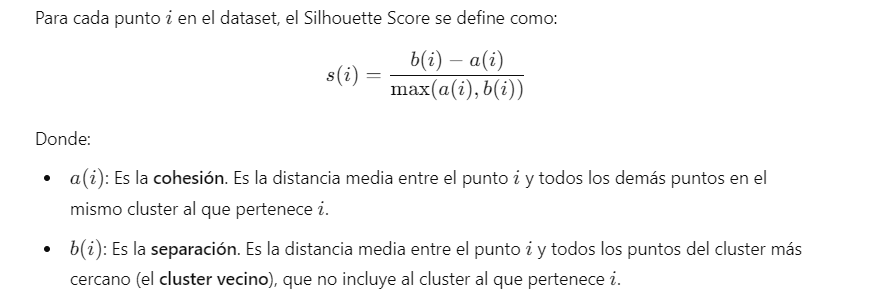

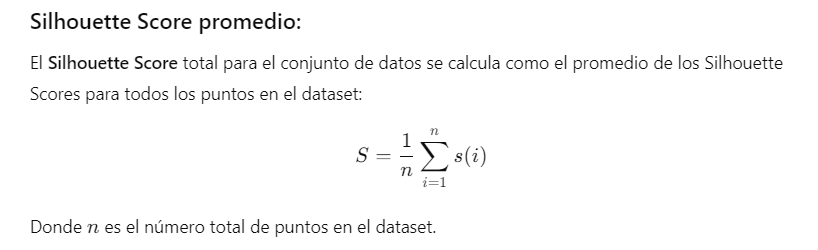